# 1. Lectura del dataset con pandas

In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
carpeta = 'dataset_historico_id_3195'
lista_data = os.listdir(carpeta)

for data in lista_data : # Este bucle hay que actualizarlo con los últimos días que se descargan de la API
    if data.endswith('.jsonl'):
        fichero = data

ruta = os.path.join(carpeta, fichero)
df = pd.read_json(ruta, lines = True)
df

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,...,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin,presMax,horaPresMax,presMin,horaPresMin,sol
0,2024-10-05,3195,"MADRID, RETIRO",MADRID,667,"19,1","0,0","12,8",06:00,"25,4",...,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-10-06,3195,"MADRID, RETIRO",MADRID,667,"20,1","0,0","17,6",05:00,"22,6",...,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-10-07,3195,"MADRID, RETIRO",MADRID,667,"18,2","6,5","13,8",18:50,"22,5",...,81.0,97.0,Varias,43.0,12:10,NaN,NaN,NaN,NaN,NaN
3,2024-10-08,3195,"MADRID, RETIRO",MADRID,667,"15,0","0,4","12,7",05:00,"17,4",...,85.0,96.0,01:10,73.0,12:50,NaN,NaN,NaN,NaN,NaN
4,2024-10-09,3195,"MADRID, RETIRO",MADRID,667,"16,6","4,7","13,8",23:59,"19,5",...,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38406,1920-03-09,3195,"MADRID, RETIRO",MADRID,667,"1,8",Ip,"-0,7",06:00,"4,4",...,46.0,NaN,NaN,NaN,NaN,"951,7",23,"945,7",03,"8,2"
38407,1920-03-10,3195,"MADRID, RETIRO",MADRID,667,"3,5","0,0","-0,6",03:00,"7,6",...,55.0,NaN,NaN,NaN,NaN,"951,5",00,"949,1",14,"6,7"
38408,1920-03-11,3195,"MADRID, RETIRO",MADRID,667,"5,4","0,0","-1,8",05:00,"12,7",...,57.0,NaN,NaN,NaN,NaN,"951,2",09,"948,6",16,"10,0"
38409,1920-03-12,3195,"MADRID, RETIRO",MADRID,667,"10,5","0,0","5,9",00:15,"15,1",...,NaN,NaN,NaN,NaN,NaN,"949,5",10,"947,3",24,"5,7"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38411 entries, 0 to 38410
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fecha        38411 non-null  object 
 1   indicativo   38411 non-null  int64  
 2   nombre       38411 non-null  object 
 3   provincia    38411 non-null  object 
 4   altitud      38411 non-null  int64  
 5   tmed         38275 non-null  object 
 6   prec         37446 non-null  object 
 7   tmin         38275 non-null  object 
 8   horatmin     37391 non-null  object 
 9   tmax         38277 non-null  object 
 10  horatmax     37425 non-null  object 
 11  dir          29913 non-null  float64
 12  velmedia     32983 non-null  object 
 13  racha        30004 non-null  object 
 14  horaracha    29631 non-null  object 
 15  hrMedia      37038 non-null  float64
 16  hrMax        5952 non-null   float64
 17  horaHrMax    5952 non-null   object 
 18  hrMin        5951 non-null   float64
 19  hora

# 2. Pre-procesamiento

Los campos indicativo, nombre, provincia y altitud son los mismos para todos los registros, por lo que no es necesario incluirlos en el dataframe.m

In [4]:
df = df[df.columns[5:].insert(0, 'fecha')] # Se filtra el dataframe para que contenga solo las columnas de interés

Se pone en formato fecha la columna de fechas, que va a ser el campo índice

In [5]:
df["fecha"] = pd.to_datetime(df["fecha"])
df.set_index("fecha", inplace=True)
df.sort_index(inplace=True, ascending=False)

C:\Users\felix\AppData\Local\Temp\ipykernel_17636\2099670388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fecha"] = pd.to_datetime(df["fecha"])
C:\Users\felix\AppData\Local\Temp\ipykernel_17636\2099670388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_index(inplace=True, ascending=False)


Hay campos numericos que pandas lee como texto debido a que el decimal es una coma y no un punto. Por lo tanto, se sustituye las comas por puntos. Además, interesa poner el formato hora en formato numérico

In [6]:
df.replace(',','.', regex=True, inplace=True)
df.replace(':','.', regex = True, inplace = True) 
# Se reemplazan las comas por puntos y los dos puntos por puntos para poder convertir a float
columnas_numericas = ['tmed', 'prec', 'tmin', 'tmax', 'velmedia', 'racha', 'presMax', 'presMin', 'sol']
for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()

C:\Users\felix\AppData\Local\Temp\ipykernel_17636\3586366732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(',','.', regex=True, inplace=True)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38411 entries, 2025-04-03 to 1920-01-01
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tmed         38275 non-null  float64
 1   prec         36038 non-null  float64
 2   tmin         38275 non-null  float64
 3   horatmin     37391 non-null  object 
 4   tmax         38277 non-null  float64
 5   horatmax     37425 non-null  object 
 6   dir          29913 non-null  float64
 7   velmedia     32983 non-null  float64
 8   racha        30004 non-null  float64
 9   horaracha    29631 non-null  object 
 10  hrMedia      37038 non-null  float64
 11  hrMax        5952 non-null   float64
 12  horaHrMax    5952 non-null   object 
 13  hrMin        5951 non-null   float64
 14  horaHrMin    5950 non-null   object 
 15  presMax      36948 non-null  float64
 16  horaPresMax  36948 non-null  object 
 17  presMin      36948 non-null  float64
 18  horaPresMin  36946 non-null  

C:\Users\felix\AppData\Local\Temp\ipykernel_17636\3586366732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(':','.', regex = True, inplace = True)
C:\Users\felix\AppData\Local\Temp\ipykernel_17636\3586366732.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


Hay campos cuyo valor es igual a "varias".

In [7]:
df[df["horatmin"] == "Varias"]

,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin,presMax,horaPresMax,presMin,horaPresMin,sol
fecha,,,,,,,,,,,,,,,,,,,,
2025-03-29,12.8,0.0,6.2,Varias,19.3,14.30,2.0,1.7,10.8,16.30,51.0,86.0,06.50,23.0,14.30,943.2,10,940.4,17,NaN
2025-03-28,12.3,0.0,6.2,Varias,18.4,15.00,33.0,1.1,8.3,17.30,49.0,84.0,06.40,26.0,14.30,941.8,23,937.4,04,NaN
2025-03-18,8.8,20.9,6.2,Varias,11.4,16.00,12.0,2.8,10.8,10.00,NaN,NaN,NaN,NaN,NaN,938.3,24,931.8,Varias,NaN
2025-03-14,7.2,0.0,4.1,Varias,10.4,14.00,5.0,3.6,12.2,09.10,57.0,96.0,00.00,38.0,17.00,929.6,24,919.3,04,NaN
2025-03-10,8.6,23.5,5.8,Varias,11.5,15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921-07-26,26.0,0.0,17.8,Varias,34.3,15.30,NaN,1.1,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1921-06-25,22.5,0.0,15.6,Varias,29.4,14.50,20.0,0.6,3.1,16.30,53.0,NaN,NaN,NaN,NaN,942.6,Varias,941.3,18,12.5
1921-02-27,7.2,8.9,5.6,Varias,8.8,15.00,NaN,2.5,NaN,NaN,91.0,NaN,NaN,NaN,NaN,954.5,24,948.6,00,0.0


In [8]:
df.replace('Varias', np.nan, inplace=True) # Se reemplaza el valor 'Varias' por NaN para poder convertir a float los campos de horas
lista_campos_horas = ['horatmin', 'horatmax', 'horaracha', 'horaHrMax', 'horaHrMin', 'horaPresMax', 'horaPresMin']
df[lista_campos_horas] = df[lista_campos_horas].astype(float) # Se convierten los campos de horas a float

C:\Users\felix\AppData\Local\Temp\ipykernel_17636\1347674842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('Varias', np.nan, inplace=True) # Se reemplaza el valor 'Varias' por NaN para poder convertir a float los campos de horas
C:\Users\felix\AppData\Local\Temp\ipykernel_17636\1347674842.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[lista_campos_horas] = df[lista_campos_horas].astype(float) # Se convierten los campos de horas a float


Se comprueba que todos los campos son numéricos

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38411 entries, 2025-04-03 to 1920-01-01
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tmed         38275 non-null  float64
 1   prec         36038 non-null  float64
 2   tmin         38275 non-null  float64
 3   horatmin     35760 non-null  float64
 4   tmax         38277 non-null  float64
 5   horatmax     36106 non-null  float64
 6   dir          29913 non-null  float64
 7   velmedia     32983 non-null  float64
 8   racha        30004 non-null  float64
 9   horaracha    28828 non-null  float64
 10  hrMedia      37038 non-null  float64
 11  hrMax        5952 non-null   float64
 12  horaHrMax    4297 non-null   float64
 13  hrMin        5951 non-null   float64
 14  horaHrMin    4518 non-null   float64
 15  presMax      36948 non-null  float64
 16  horaPresMax  35492 non-null  float64
 17  presMin      36948 non-null  float64
 18  horaPresMin  35313 non-null  

# 3. Visualizaciones de los datos

## 3.1 Precipitación

<Axes: xlabel='fecha'>

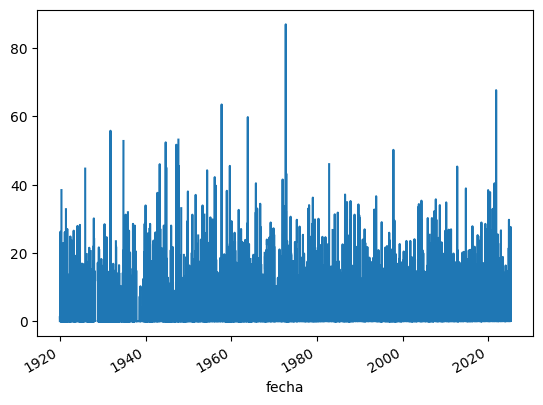

In [19]:
df["prec"].plot() # Gráfico de la precipitación con una frecuencia diaria

C:\Users\felix\AppData\Local\Temp\ipykernel_17636\36440213.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  precipitacion_anual = df['prec'].resample('Y').sum()


<Axes: xlabel='fecha'>

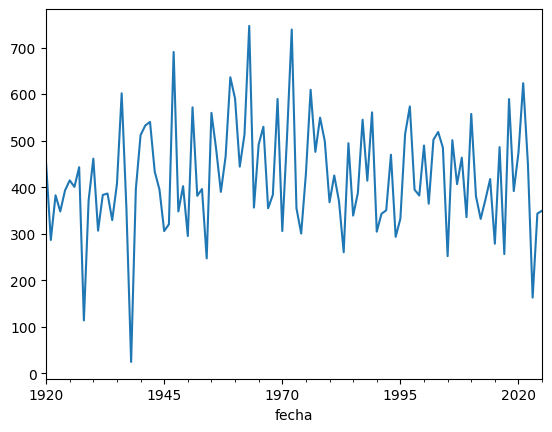

In [ ]:
precipitacion_anual = df['prec'].resample('Y').sum()

precipitacion_anual.plot()

## 3.2 Temperatura

C:\Users\felix\AppData\Local\Temp\ipykernel_17636\4109026544.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  temperaturas = df[['tmin','tmed','tmax']].resample('Y').mean()


<Axes: xlabel='fecha'>

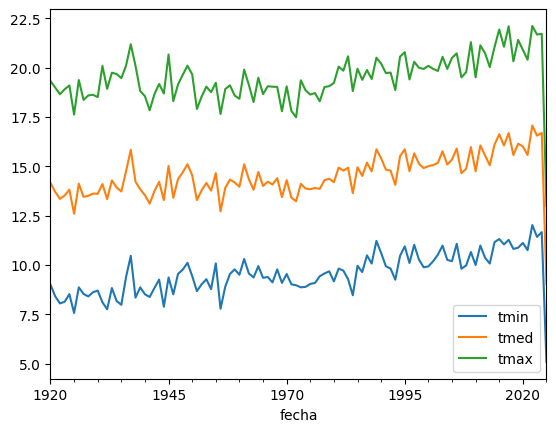

In [13]:
temperaturas = df[['tmin','tmed','tmax']].resample('Y').mean()

temperaturas.plot()

C:\Users\felix\AppData\Local\Temp\ipykernel_17636\2497395775.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  hora_temperaturas = df[['horatmin','horatmax']].resample('Y').mean()


<Axes: xlabel='fecha'>

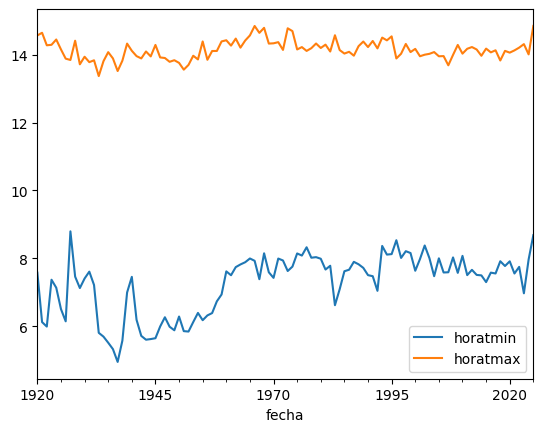

In [18]:
hora_temperaturas = df[['horatmin','horatmax']].resample('Y').mean()
hora_temperaturas.plot()

## 3.3 Insolación

C:\Users\felix\AppData\Local\Temp\ipykernel_17636\3207120584.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  insolacion = df[['sol']].resample('Y').mean()


<Axes: xlabel='fecha'>

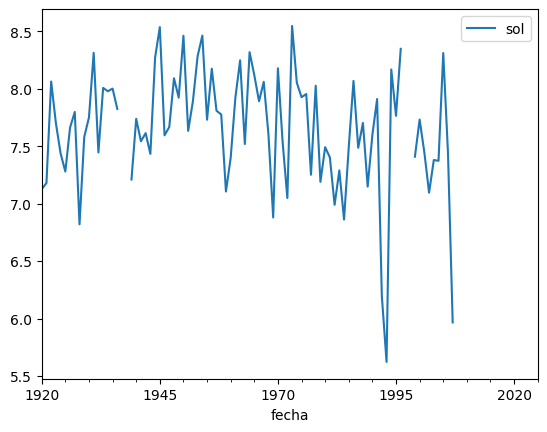

In [14]:
insolacion = df[['sol']].resample('Y').mean()
insolacion.plot()

## 3.4 Presión

C:\Users\felix\AppData\Local\Temp\ipykernel_17636\2171022622.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  presiones = df[['presMin', 'presMax']].resample('Y').mean()


<Axes: xlabel='fecha'>

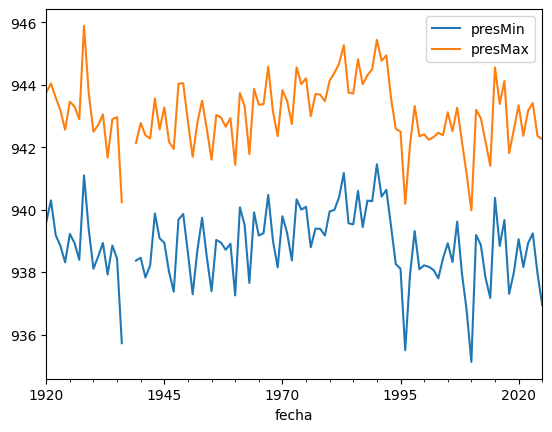

In [15]:
presiones = df[['presMin', 'presMax']].resample('Y').mean()
presiones.plot()

C:\Users\felix\AppData\Local\Temp\ipykernel_17636\2036376267.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  hora_presiones = df[['horaPresMin', 'horaPresMax']].resample('Y').mean()


<Axes: xlabel='fecha'>

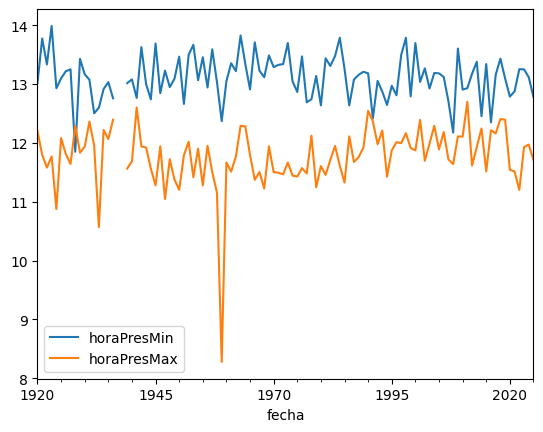

In [23]:
hora_presiones = df[['horaPresMin', 'horaPresMax']].resample('Y').mean()
hora_presiones.plot()

## 3.5 Humedad

C:\Users\felix\AppData\Local\Temp\ipykernel_17636\2141779905.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  humedad = df[['hrMin', 'hrMedia', 'hrMax']].resample('Y').mean()


<Axes: xlabel='fecha'>

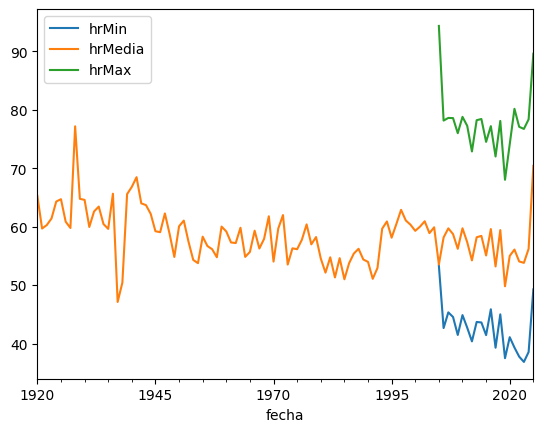

In [16]:
humedad = df[['hrMin', 'hrMedia', 'hrMax']].resample('Y').mean()
humedad.plot()

C:\Users\felix\AppData\Local\Temp\ipykernel_17636\199392318.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  hora_humedades = df[['horaHrMin', 'horaHrMax']].resample('Y').mean()


<Axes: xlabel='fecha'>

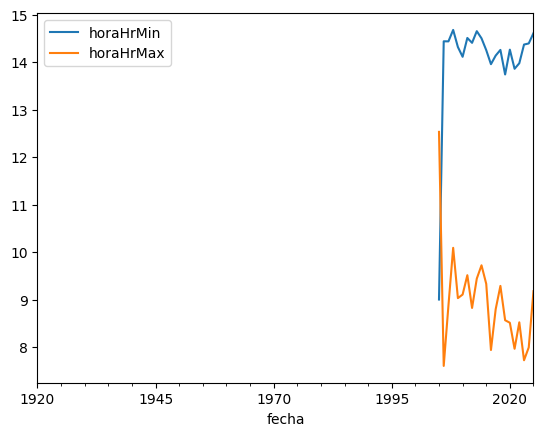

In [24]:
hora_humedades = df[['horaHrMin', 'horaHrMax']].resample('Y').mean()
hora_humedades.plot()

## 3.6 Viento

C:\Users\felix\AppData\Local\Temp\ipykernel_17636\40040869.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  viento = df[['velmedia', 'racha']].resample('Y').mean()


<Axes: xlabel='fecha'>

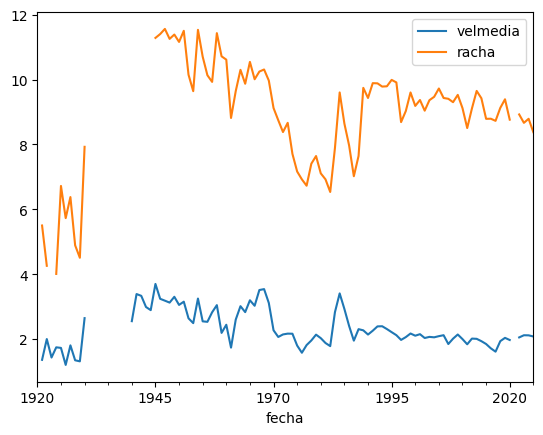

In [17]:
viento = df[['velmedia', 'racha']].resample('Y').mean()
viento.plot()

C:\Users\felix\AppData\Local\Temp\ipykernel_17636\481535316.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  hora_viento = df[['horaracha']].resample('Y').mean()


<Axes: xlabel='fecha'>

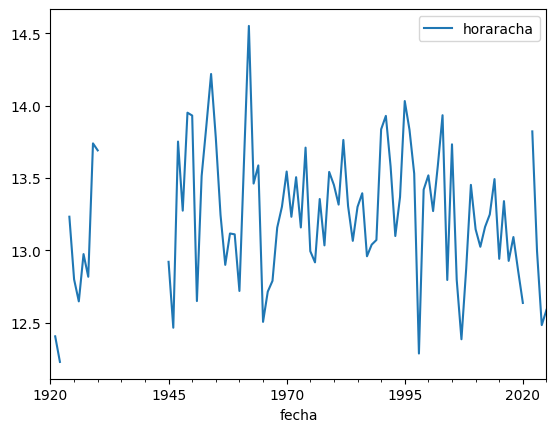

In [25]:
hora_viento = df[['horaracha']].resample('Y').mean()
hora_viento.plot()

## 3.7 Resumen estadístico del DataFrame

In [29]:
df.describe()

,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin,presMax,horaPresMax,presMin,horaPresMin,sol
count,38275.000000,36038.000000,38275.00000,35760.000000,38277.000000,36106.000000,29913.000000,32983.000000,30004.000000,28828.000000,37038.000000,5952.000000,4297.000000,5951.000000,4518.000000,36948.000000,35492.000000,36948.000000,35313.000000,28654.000000
mean,14.558840,1.243701,9.58718,7.257065,19.530457,14.143000,18.907164,2.354052,8.967591,13.245592,58.225687,76.434308,8.755951,41.528315,14.244517,943.078386,11.757410,938.873027,13.123666,7.687189
std,7.401715,3.881364,6.46240,5.142773,8.593438,2.049279,15.094178,1.842536,4.052854,6.745151,18.254577,16.453640,7.059909,17.326819,3.728864,5.656901,8.856959,6.397460,7.962732,4.158511
min,-6.600000,0.000000,-10.10000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,30.000000,0.000000,5.000000,0.000000,912.200000,0.000000,902.900000,0.000000,0.000000
25%,8.400000,0.000000,4.50000,5.300000,12.200000,13.300000,5.000000,1.100000,6.100000,9.100000,43.000000,63.000000,5.000000,28.000000,13.400000,939.800000,7.000000,935.500000,4.000000,4.600000
50%,13.700000,0.000000,9.00000,6.000000,18.600000,14.100000,21.000000,1.900000,8.600000,14.300000,56.000000,78.000000,6.300000,38.000000,15.000000,943.100000,10.000000,939.200000,17.000000,8.500000
75%,20.800000,0.100000,14.90000,7.000000,26.800000,15.000000,27.000000,3.100000,11.400000,18.000000,72.000000,92.000000,8.100000,53.000000,16.000000,946.500000,23.000000,942.800000,18.000000,11.000000
max,33.400000,87.000000,26.20000,23.590000,40.700000,23.590000,99.000000,16.900000,32.200000,23.590000,100.000000,100.000000,23.590000,98.000000,23.590000,967.300000,24.000000,962.300000,24.000000,14.900000
